In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

### read all datasets

In [2]:
internetPjl = pd.read_csv('../data/2015-2018年各省互联网普及率.csv',encoding='GBK')
GDP = pd.read_csv('../data/2019各省人均GDP.csv',encoding='GBK')
company = pd.read_csv('../data/cleaned_compc.csv',encoding='GBK')
schoolpop = pd.read_csv('../data/schoolpop.csv',encoding='GBK')
dzdp = pd.read_csv('../data/大众点评.csv',encoding='utf-8')
baiduss = pd.read_csv('../data/关注度.csv',encoding='utf-8')

C:\Users\cyane\Downloads\Python\Anaconda3\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
company['省份赋值'] = 1  #方便计算公司数量
summarized_company = company.groupby(by = '所属省份')['省份赋值'].sum()
summarized_company = pd.DataFrame(summarized_company)
company_account = summarized_company.reset_index()
company_account = company_account.rename(columns = {'所属省份':'省份/直辖市','省份赋值':'少儿编程公司数量'})
#print(company_account['少儿编程公司数量'].sum())
#company_account

In [4]:
baiduss = baiduss.rename(columns = {'省份':'省份/直辖市','搜索指数日均值':'百度搜索指数'})
baiduss = baiduss.sort_values(by = '百度搜索指数',axis = 0,ascending = True)
#baiduss

In [5]:
internetPjl2018 = internetPjl[['省市','2018年互联网普及率%']]
internetPjl2018 = internetPjl2018.rename(columns = {'省市':'省份/直辖市'})
#internetPjl2018

In [6]:
provGDP = GDP[['省份','人均GDP（美元）']]
provGDP = provGDP.drop_duplicates()
provGDP = provGDP.rename(columns = {'省份':'省份/直辖市','人均GDP（美元）':'2019人均GDP（美元）'})
#provGDP

In [7]:
zxrk = schoolpop[['省份','小初高人口合计（万人）']]
zxrk = zxrk.rename(columns = {'省份':'省份/直辖市','小初高人口合计（万人）':'小初高在校人口数（万人）'})
zxrk = zxrk.dropna()
#zxrk

In [8]:
provdzdp = dzdp.groupby(by = '省市')['搜索“少儿编程”结果数量'].sum()
provdzdp = pd.DataFrame(provdzdp)
provdzdp
provdzdp_search = provdzdp.reset_index()
provdzdp_search = provdzdp_search.rename(columns = {'省市':'省份/直辖市','搜索“少儿编程”结果数量':'大众点评搜索数量'})
#provdzdp_search

### merge all data into one dataframe 

In [488]:
alldata = [provGDP,internetPjl2018,baiduss,company_account,zxrk,provdzdp_search]
finaldf = pd.DataFrame({'省份/直辖市':baiduss['省份/直辖市']})
for table in alldata:
    finaldf = pd.merge(finaldf,table,how='outer')
finaldf = finaldf.fillna(0)
finaldf = finaldf.sort_values(by = '少儿编程公司数量',axis = 0,ascending = True)
finaldf.set_index(["省份/直辖市"], inplace=True)
finaldf.head(5)

,2019人均GDP（美元）,2018年互联网普及率%,百度搜索指数,少儿编程公司数量,小初高在校人口数（万人）,大众点评搜索数量
省份/直辖市,,,,,,
西藏,7158,47,4,0.0,54.02,0.0
青海,7127,54,29,0.0,91.25,28.0
宁夏,7897,52,69,0.0,109.22,72.0
海南,8237,51,99,0.0,148.94,21.0
黑龙江,5230,52,124,1.0,298.00,260.0


In [461]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 西藏 to 广东
Data columns (total 6 columns):
2019人均GDP（美元）    31 non-null int64
2018年互联网普及率%     31 non-null int64
百度搜索指数           31 non-null int64
少儿编程公司数量         31 non-null float64
小初高在校人口数（万人）     31 non-null float64
大众点评搜索数量         31 non-null float64
dtypes: float64(3), int64(3)
memory usage: 2.9+ KB


### visualize data

- **The number of youth programing education enterprises & The number of offline Youth programing training institutions on dianping by province**

    - Bubble chart

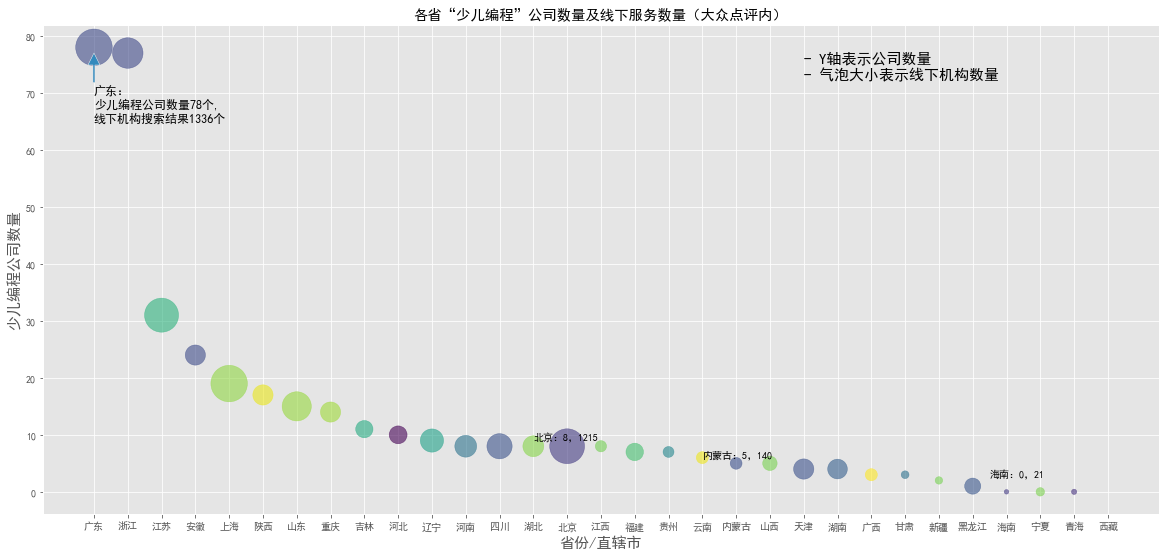

In [462]:
plt.figure(figsize=(20, 9))
plt.style.use('ggplot')

# Draw a graph
colors = np.random.rand(len(dzdp_comp.index))  # 气泡颜色数组
size = dzdp_comp['大众点评搜索数量'] # the size of circle represents the number of search result
plt.scatter(dzdp_comp.index,dzdp_comp['少儿编程公司数量'],  s=size,c = colors, alpha=0.6)

# Add label and annotates 
plt.xlabel('省份/直辖市',fontsize=15)
plt.ylabel('少儿编程公司数量',fontsize=15)
plt.gca().invert_xaxis()

plt.text(x=9,y=72,s = '- Y轴表示公司数量\n- 气泡大小表示线下机构数量',fontsize=15,verticalalignment="bottom",horizontalalignment="left")
plt.title('各省“少儿编程”公司数量及线下服务数量（大众点评内）')
plt.annotate("广东：\n少儿编程公司数量78个,\n线下机构搜索结果1336个",xy = (30,77),xytext=(30,65),xycoords='data',fontsize=12,
             arrowprops=dict(width = 2))
plt.annotate("北京：8，1215",(17,9))
plt.annotate("内蒙古：5，140",(12,6))
plt.annotate("海南：0，21",(3.5,2.5))



#plt.savefig('./comp_dzdp_bubble.jpg') # Save the picture
plt.show()
#reference：https://blog.csdn.net/robert_chen1988/article/details/100027423

- **Baidu search index of *Youth programing* by province**

In [491]:
#规范各变量的颜色，确保可视化整体的统一性
def ValueColor(columname):
    columnames = finaldf.columns.values
    colors = ['royalblue','lightseagreen','slateblue','hotpink','slategray','orange']
    columcolor={}
    i = 0
    for item in columnames:
        columcolor[item] = colors[i] 
        i += 1
    return columcolor[columname]

In [492]:
#画横版grouped bar
def GroupedBar(groupeddata,label1,label2):
    col1 = groupeddata.columns.values[0]
    col2 = groupeddata.columns.values[1]
    groupeddata = groupeddata.sort_values(by = col1,axis = 0,ascending = False)
    fig = plt.figure(figsize = (15,8))
    ax1 = fig.add_subplot(111)
    
    width = 0.3
    x1_list = []
    x2_list = []
    i = 0
    for item in groupeddata.index:
        x1_list.append(i)
        x2_list.append(i+width)
        i+=1

    ax1.bar(x1_list,groupeddata[col1].values,width=width,label=label1,tick_label = groupeddata.index,edgecolor = 'white',color = ValueColor(groupeddata.columns.values[0]))
    ax1.legend(bbox_to_anchor=(1,1))
    ax1.set_ylabel(label1)
    ax1.set_xlabel("省份/直辖市")

    ax2 = ax1.twinx()
    ax2.bar(x2_list,groupeddata[col2],width=width,label=label2,color = ValueColor(groupeddata.columns.values[1]),edgecolor = 'white')
    ax2.legend(bbox_to_anchor=(1,0.95))
    ax2.set_ylabel(label2)
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.show()

In [493]:
#画竖版grouped bar
def GroupedBarh(groupeddata,label1,label2):
    col1 = groupeddata.columns.values[0]
    col2 = groupeddata.columns.values[1]
    fig = plt.figure(figsize = (8,13))
    ax1 = fig.add_subplot(111)
    
    width = 0.3
    x1_list = []
    x2_list = []
    i = 0
    for item in groupeddata.index:
        x1_list.append(i)
        x2_list.append(i+width)
        i+=1

    ax1.barh(x1_list,groupeddata[col1].values,height=width,label=label1,tick_label = groupeddata.index,edgecolor = 'white',color = ValueColor(groupeddata.columns.values[0]))
    ax1.legend(bbox_to_anchor=(1,0.05))
    ax1.set_xlabel(label1)
    ax1.set_ylabel("省份/直辖市")

    ax2 = ax1.twiny()
    ax2.barh(x2_list,groupeddata[col2],height=width,label=label2,color = ValueColor(groupeddata.columns.values[1]),edgecolor = 'white')
    ax2.legend(bbox_to_anchor=(1,0.08))
    ax2.set_xlabel(label2)
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.show()

In [497]:
#画grouped棒棒糖图
def Groupedlolli(groupeddata,label1,label2):
    col1 = groupeddata.columns.values[0]
    col2 = groupeddata.columns.values[1]
    groupeddata = groupeddata.sort_values(by = col1,axis = 0,ascending = False)
    color1 = ValueColor(groupeddata.columns.values[0])
    color2 = ValueColor(groupeddata.columns.values[1])
    width = 0.3
    x1_list = []
    x2_list = []
    i = 0
    for item in groupeddata.index:
        x1_list.append(i)
        x2_list.append(i+width)
        i+=1    

    fig = plt.figure(figsize = (15,8))
    ax1 = fig.add_subplot(111)
    ax1.set_ylabel(label1)
    ax1.set_xlabel("省份/直辖市")
    plt.xticks(range(0,len(groupeddata.index)), groupeddata.index)

    (markers, stemlines, baseline) = ax1.stem(x1_list,groupeddata[col1].values,markerfmt='o',label = label1)
    plt.setp(markers, marker='o', markersize=6, c =color1, markeredgewidth=2)
    plt.setp(stemlines, c =color1)
    ax1.legend(bbox_to_anchor=(1,1))
             
    ax2 = ax1.twinx()
    (markers, stemlines, baseline) = ax2.stem(x2_list,groupeddata[col2].values,markerfmt='o',label = label2)
    plt.setp(markers, marker='o', markersize=6, c =color2, markeredgewidth=2)
    plt.setp(stemlines, c = color2)
    ax2.legend(bbox_to_anchor=(1,0.96))
    ax2.set_ylabel(label2)
    plt.show()

In [658]:
#画气泡图
def ValueColormap(colname):
    values = ['2018年互联网普及率%', '百度搜索指数', '2019人均GDP（美元）', 
              '小初高在校人口数（万人）','大众点评搜索数量', '少儿编程公司数量']
    colormaps = ['BuGn','Purples','Blues','Greys','YIOrBr','RdPu']
    color = {}
    i = 0
    for item in values:
        color[item] = colormaps[i] 
        i += 1
    return color[colname]

def Bubbleplot(colname,label,ajn):
    df= finaldf.loc[:, ['少儿编程公司数量','大众点评搜索数量',colname]]
    df= df.sort_values(by = '少儿编程公司数量',axis = 0,ascending = False)
    fig = plt.figure(figsize = (18,8))
    cm = plt.cm.get_cmap(ValueColormap(colname))
    sc = plt.scatter(df['少儿编程公司数量'],df['大众点评搜索数量'],c = df[colname],s = df[colname]*ajn,
                     vmin=0, vmax=max(df[colname]),edgecolor = 'white',cmap = cm)
    plt.colorbar(sc)
    for i, txt in enumerate(df.index):
        plt.annotate(txt, (df['少儿编程公司数量'][i]-1, df['大众点评搜索数量'][i]),c = 'ghostwhite')
    plt.xlabel('少儿编程公司数量')
    plt.ylabel('线下编程机构数量（via 大众点评）')
    plt.text(x=55,y=1,s = '气泡大小及颜色表示'+label,fontsize=12,verticalalignment="bottom",horizontalalignment="left")
    plt.title('少儿编程发展与'+label)
    #plt.legend()
    plt.show()

- **GDP by porvince**

In [669]:
#Bubbleplot('2019人均GDP（美元）','2019人均GDP（美元）',0.1)

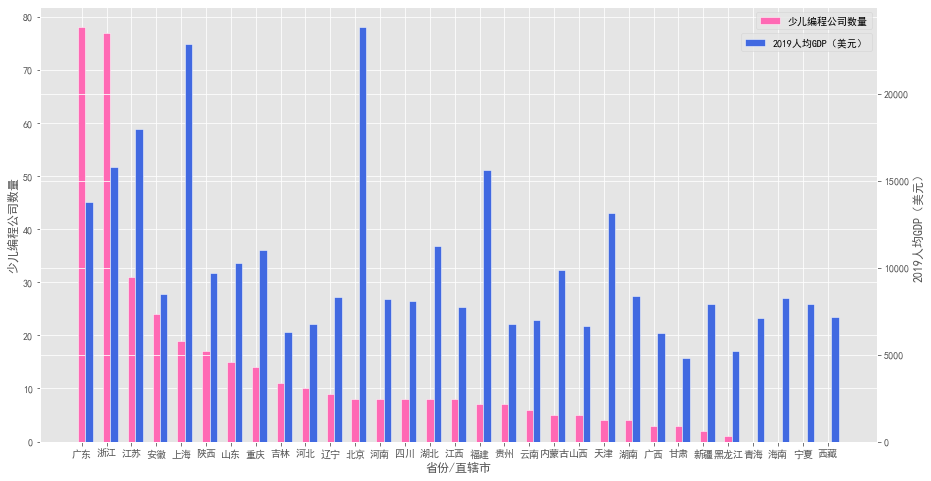

In [495]:
gdp_comp = finaldf.loc[:,['少儿编程公司数量','2019人均GDP（美元）']]
GroupedBar(gdp_comp,'少儿编程公司数量','2019人均GDP（美元）')

In [504]:
#Groupedlolli(gdp_comp,'少儿编程公司数量','2019人均GDP（美元）')

In [505]:
#GroupedBarh(gdp_comp,'少儿编程公司数量','2019人均GDP（美元）')

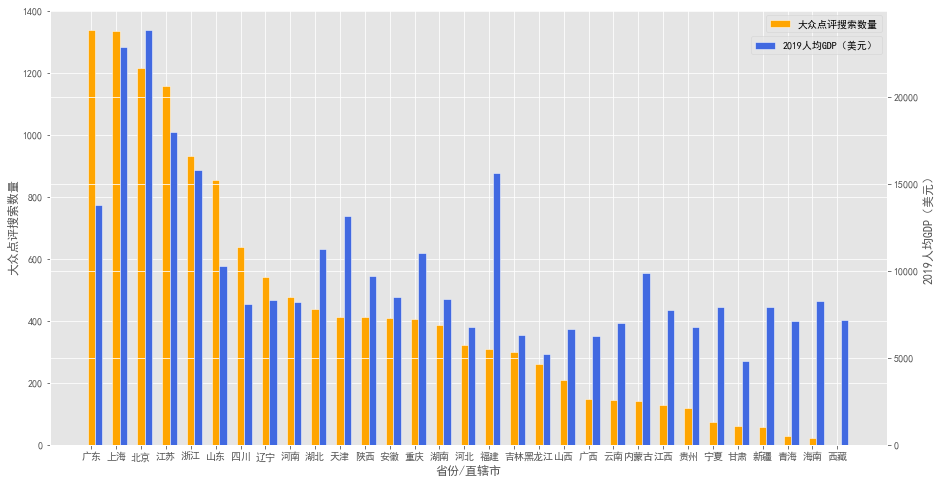

In [501]:
gdp_dzdp = finaldf.loc[:,['大众点评搜索数量','2019人均GDP（美元）']]
GroupedBar(gdp_dzdp,,'线下编程机构数量（via 大众点评）','2019人均GDP（美元）')

In [506]:
#Groupedlolli(gdp_dzdp,'线下编程机构数量（via 大众点评）','2019人均GDP（美元）')

In [507]:
#GroupedBarh(gdp_dzdp,'线下编程机构数量（via 大众点评）','2019人均GDP（美元）')

- **Primary, secondary and high school students population**

In [647]:
#Bubbleplot('小初高在校人口数（万人）','小初高在校人口数（万人）',1)

C:\Users\cyane\Downloads\Python\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\cyane\Downloads\Python\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


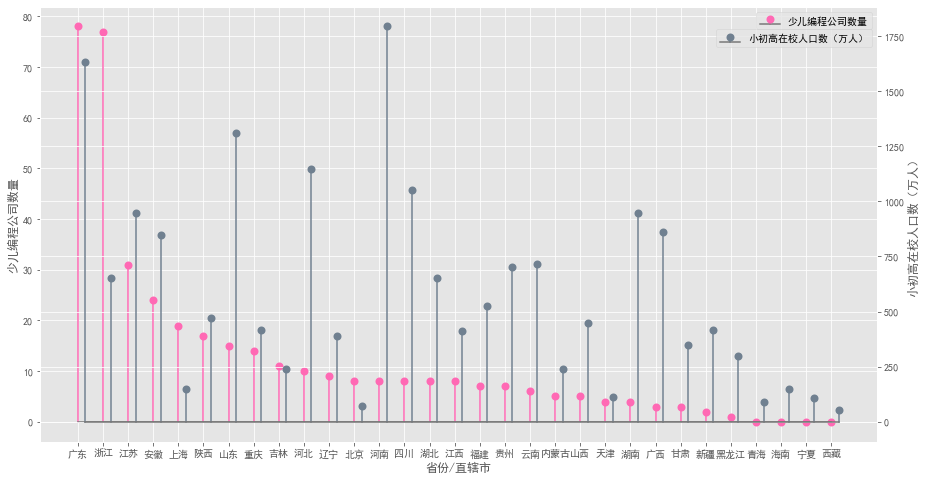

In [510]:
zxrk_comp = finaldf.loc[:,['少儿编程公司数量','小初高在校人口数（万人）']]
#GroupedBar(zxrk_comp,'少儿编程公司数量','小初高在校人口数（万人）')
Groupedlolli(zxrk_comp,'少儿编程公司数量','小初高在校人口数（万人）')
#GroupedBarh(zxrk_comp,'少儿编程公司数量','小初高在校人口数（万人）')

C:\Users\cyane\Downloads\Python\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\cyane\Downloads\Python\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


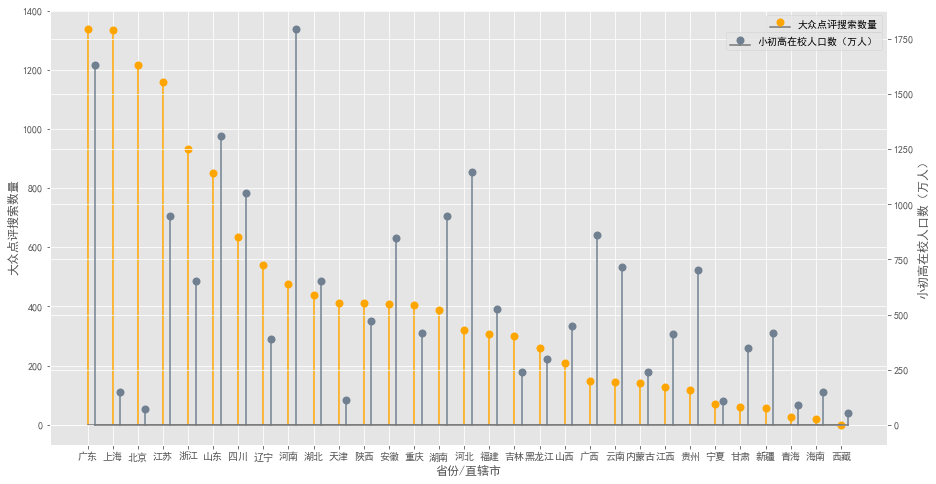

In [509]:
zxrk_dzdp = finaldf.loc[:,['大众点评搜索数量','小初高在校人口数（万人）']]
#GroupedBar(zxrk_dzdp,'线下编程机构数量（via 大众点评）','小初高在校人口数（万人）')
Groupedlolli(zxrk_dzdp,'线下编程机构数量（via 大众点评）','小初高在校人口数（万人）')
#GroupedBarh(zxrk_dzdp,'线下编程机构数量（via 大众点评）','小初高在校人口数（万人）')

- **Internet penetration**

In [661]:
#Bubbleplot('2018年互联网普及率%','2018年互联网普及率%',20)

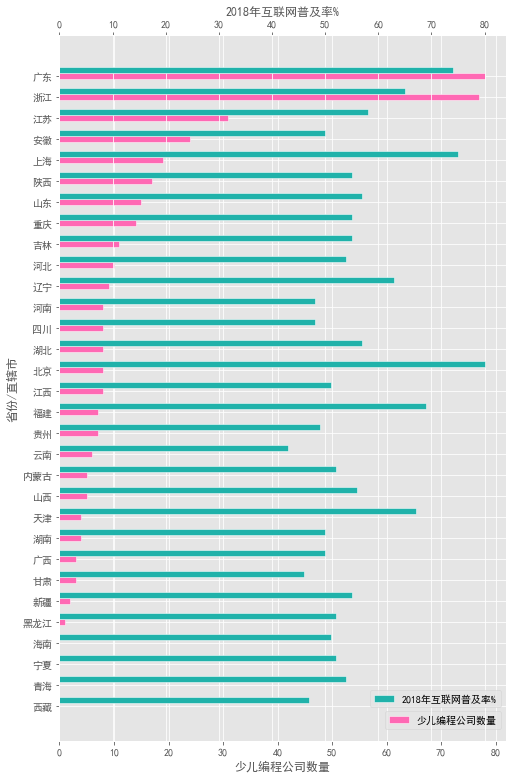

In [671]:
pjl_comp = finaldf.loc[:,['少儿编程公司数量','2018年互联网普及率%']]
#GroupedBar(pjl_comp,'少儿编程公司数量','2018年互联网普及率%')
#Groupedlolli(pjl_comp,'少儿编程公司数量','2018年互联网普及率%')
GroupedBarh(pjl_comp,'少儿编程公司数量','2018年互联网普及率%')

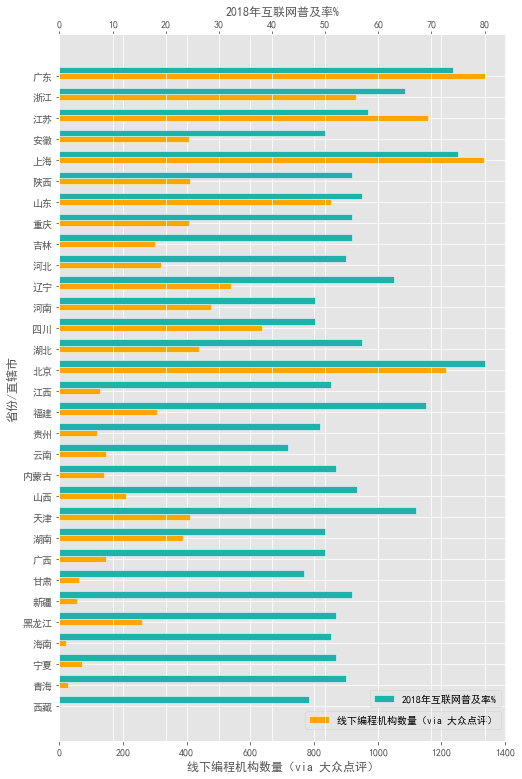

In [674]:
pjl_dzdp = finaldf.loc[:,['大众点评搜索数量','2018年互联网普及率%']]
#GroupedBar(pjl_dzdp,'线下编程机构数量（via 大众点评）','2018年互联网普及率%')
#Groupedlolli(pjl_dzdp,'线下编程机构数量（via 大众点评）','2018年互联网普及率%')
GroupedBarh(pjl_dzdp,'线下编程机构数量（via 大众点评）','2018年互联网普及率%')

- **Baidu search index of *Youth programing* by province**

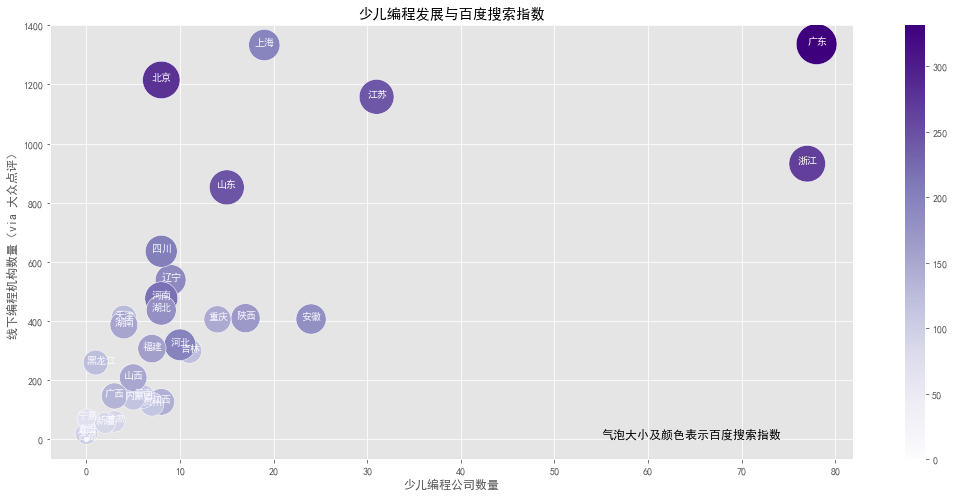

In [675]:
Bubbleplot('百度搜索指数','百度搜索指数',5)

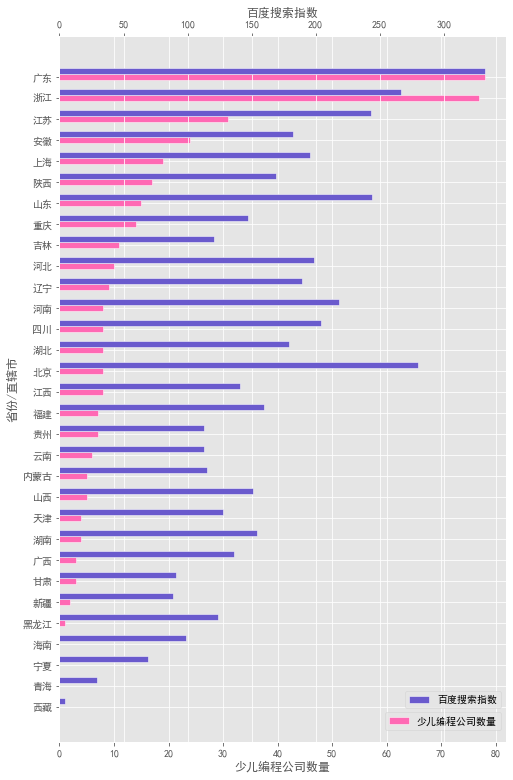

In [666]:
bd_comp = finaldf.loc[:,['少儿编程公司数量','百度搜索指数']]
#GroupedBar(bd_comp,'少儿编程公司数量','百度搜索指数')
#Groupedlolli(bd_comp,'少儿编程公司数量','百度搜索指数')
GroupedBarh(bd_comp,'少儿编程公司数量','百度搜索指数')

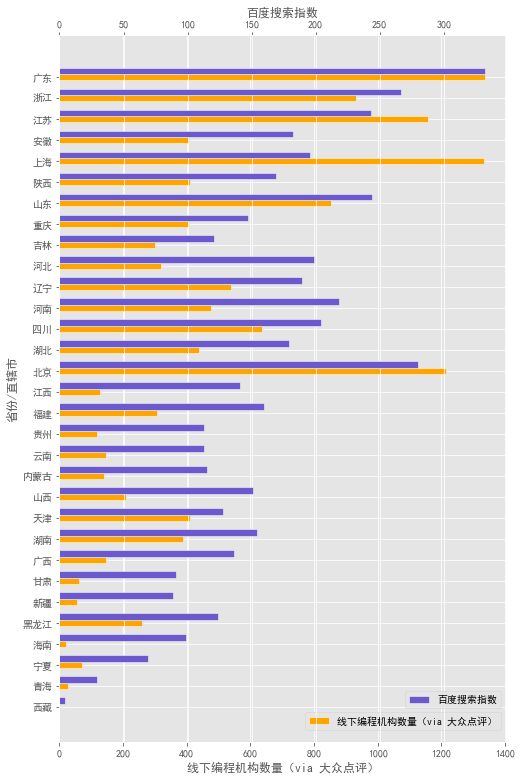

In [667]:
bd_dzdp = finaldf.loc[:,['大众点评搜索数量','百度搜索指数']]
#GroupedBar(bd_dzdp,'线下编程机构数量（via 大众点评）','百度搜索指数')
#Groupedlolli(bd_dzdp,'线下编程机构数量（via 大众点评）','百度搜索指数')
GroupedBarh(bd_dzdp,'线下编程机构数量（via 大众点评）','百度搜索指数')

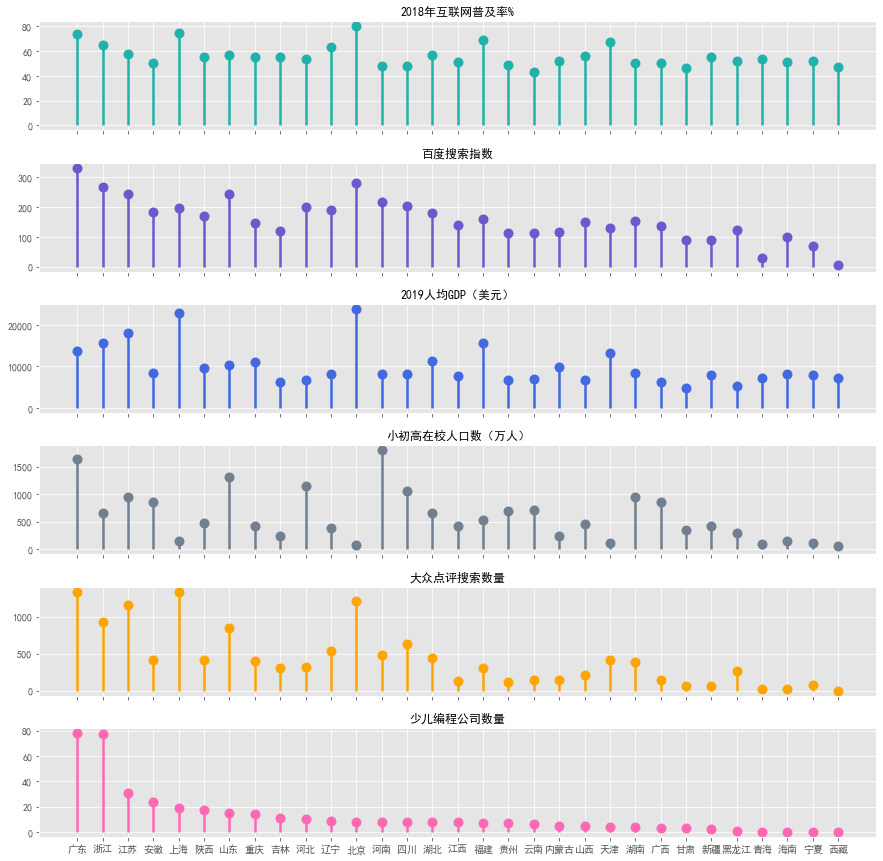

In [681]:
#groupe lollipop
fig,axes = plt.subplots(6,1,sharex=True,figsize=(15,15))
fig.subplots_adjust(wspace =0, hspace =0.3)
order = ['2018年互联网普及率%', '百度搜索指数', '2019人均GDP（美元）', '小初高在校人口数（万人）',
         '大众点评搜索数量', '少儿编程公司数量']
n = 0
for colname in order:
    color = ValueColor(colname)
    markerline, stemlines, baseline = axes[n].stem(
        finaldf1.index,colname,linefmt=color, markerfmt='o',use_line_collection=True, data=finaldf1)
    markerline.set(markerfacecolor = color,markeredgecolor = 'none',markersize = 10)
    stemlines.set(linewidths =2.5)
    baseline.set(color = 'none')
    axes[n].set_title(colname,size = 12)
    n = n+1

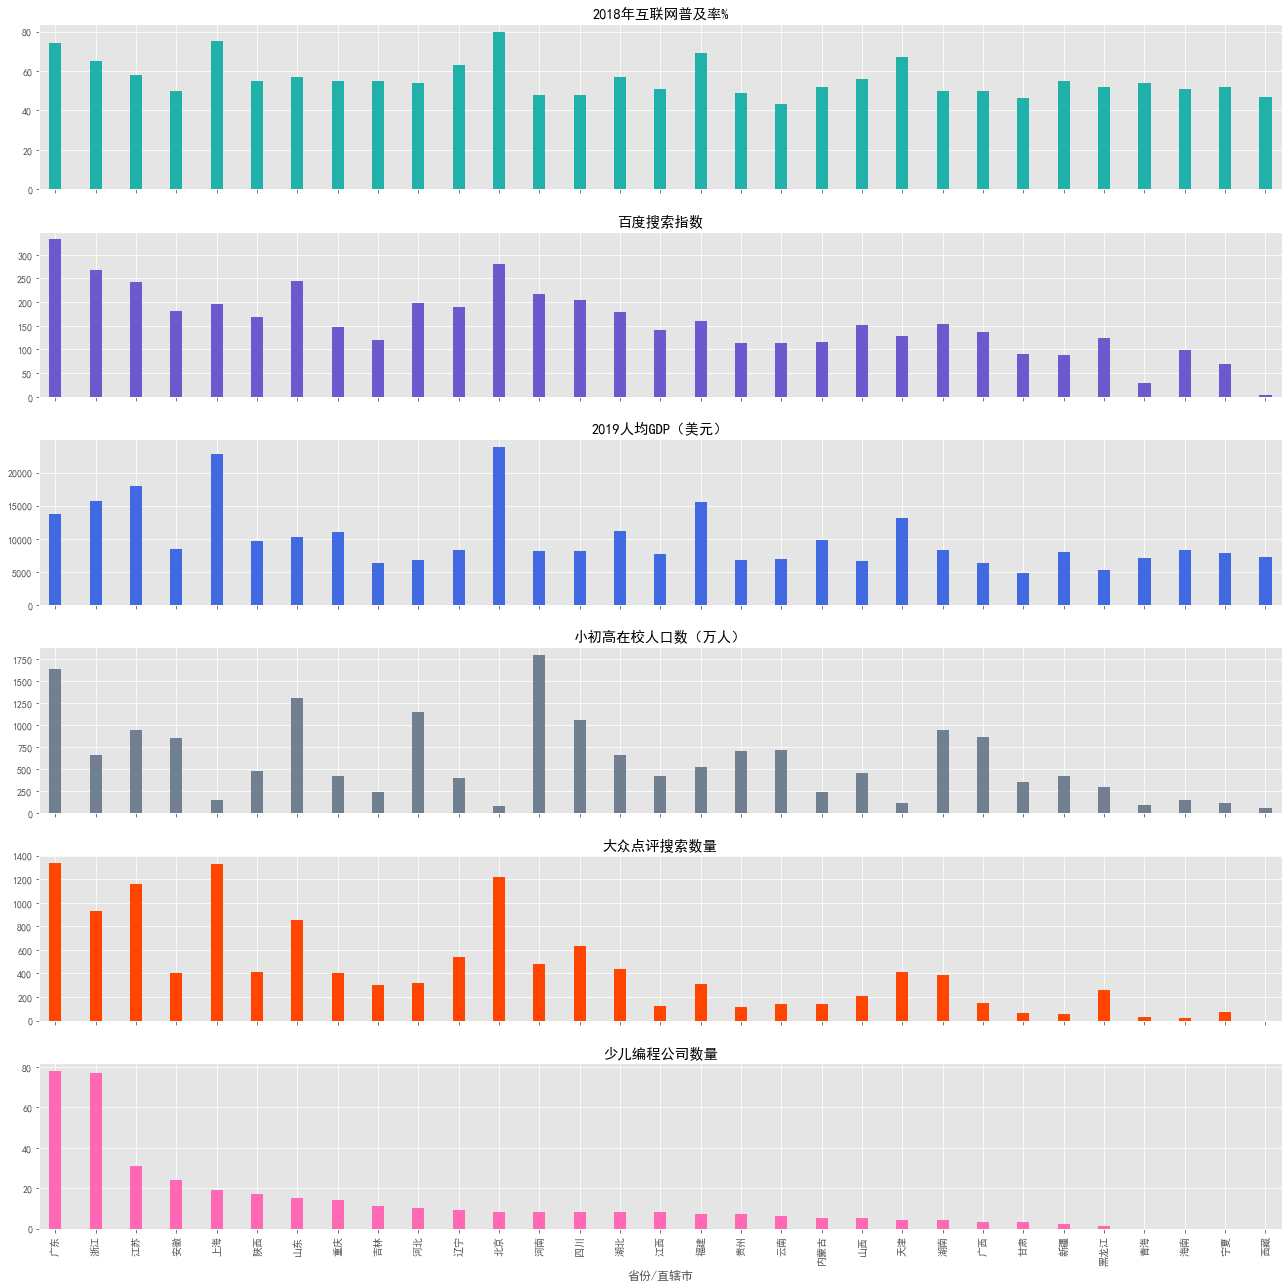

In [678]:
finaldf1 = finaldf.sort_values(by = '少儿编程公司数量',axis = 0,ascending = False)
order = ['2018年互联网普及率%', '百度搜索指数', '2019人均GDP（美元）', '小初高在校人口数（万人）',
         '大众点评搜索数量', '少儿编程公司数量']
finaldf1 = finaldf1[order]
colors = ['lightseagreen','slateblue','royalblue','slategray','orangered','hotpink']
finaldf1.plot(kind = 'bar', subplots = True, layout = (6, 1), sharex = True, sharey = False,width = 0.3,legend = False,
               color = colors,figsize=(18, 18))
plt.tight_layout(h_pad=2)
plt.savefig('./finalgroup.jpg')
plt.show()